# 모델링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/final_bis_data.xlsx')

In [59]:
test_set = pd.DataFrame(data.loc[(data['2019_06'] > 0) | (data['2019_07'] > 0) | (data['2019_08'] > 0) | (data['2019_09'] > 0) | (data['2019_10'] > 0) | (data['2019_11'] > 0) | (data['2019_12'] > 0 )])
train_set = pd.DataFrame(data.loc[(data['2017_01'] > 0) | (data['2017_02'] > 0) | (data['2017_03'] > 0) | (data['2017_04'] > 0) | (data['2017_05'] > 0) | (data['2017_06'] > 0) | (data['2017_07'] > 0 )| (data['2017_08'] > 0 )| (data['2017_09'] > 0 )| (data['2017_10'] > 0 )| (data['2017_11'] > 0 )| (data['2017_12'] > 0 ) | (data['2018_01'] > 0) | (data['2018_02'] > 0) | (data['2018_03'] > 0) | (data['2018_04'] > 0) | (data['2018_05'] > 0) | (data['2018_06'] > 0) | (data['2018_07'] > 0 )| (data['2018_08'] > 0 )| (data['2018_09'] > 0 )| (data['2018_10'] > 0 )| (data['2018_11'] > 0 )| (data['2018_12'] > 0 ) | (data['2019_01'] > 0) | (data['2019_02'] > 0) | (data['2019_03'] > 0) | (data['2019_04'] > 0) | (data['2019_05'] > 0)])

# 산업군별 모델링

나눈 5개의 산업군으로 모델링을 진행하겠다

1차적으로 class 값을 타겟으로 두어 분류를 진행하고 이를 예측하겠다.

In [63]:
data_IN = data[data['IN'] == 1]

In [64]:
data_IN

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,G,H,...,2019_09,2019_10,2019_11,2019_12,datetime,KS,ME,IN,IT,NE
36,44748,1010,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3590,1068,...,0,0,0,0,2017-01-01,0,0,1,0,0
37,44749,2966,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3250,967,...,0,0,0,0,2017-02-01,0,0,1,0,0
38,44750,4922,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3320,987.63,...,0,0,0,0,2017-03-01,0,0,1,0,0
39,44751,6878,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,2990,889.46,...,0,0,0,0,2017-04-01,0,0,1,0,0
40,44752,8834,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3125,929.62,...,0,0,0,0,2017-05-01,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69979,42763,62492,1856,A071970,STX중공업,기계,플랜트설비,코스피,2570,722,...,0,0,0,0,2019-08-01,0,0,1,0,0
69980,42764,64448,1856,A071970,STX중공업,기계,플랜트설비,코스피,2625,737,...,1,0,0,0,2019-09-01,0,0,1,0,0
69981,42765,66404,1856,A071970,STX중공업,기계,플랜트설비,코스피,2635,740,...,0,1,0,0,2019-10-01,0,0,1,0,0
69982,42766,68360,1856,A071970,STX중공업,기계,플랜트설비,코스피,3725,1046,...,0,0,1,0,2019-11-01,0,0,1,0,0


In [65]:
data_IN['G'] = data_IN['G'].apply(lambda x: float(x))

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
a = []
for i in set(data_IN.B):
    indices = data_IN[data_IN.B == i].index
    if len(indices) != 36:
        a.append(i)

In [69]:
a

['A003550',
 'A009440',
 'A002000',
 'A015860',
 'A000320',
 'A028260',
 'A000700',
 'A254120',
 'A028300',
 'A000150',
 'A068150',
 'A060560',
 'A048410',
 'A051170',
 'A002030',
 'A054800',
 'A003480',
 'A117930',
 'A198440',
 'A004870',
 'A003300',
 'A005980',
 'A226360',
 'A900130',
 'A010950',
 'A095300',
 'A000180',
 'A099660',
 'A215090',
 'A059120',
 'A900180']

In [70]:
for i in a:
    index = data_IN[data_IN.B == i].index
    data_IN = data_IN.drop(index, axis = 0)

In [71]:
data_IN

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,G,H,...,2019_09,2019_10,2019_11,2019_12,datetime,KS,ME,IN,IT,NE
36,44748,1010,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3590.0,1068,...,0,0,0,0,2017-01-01,0,0,1,0,0
37,44749,2966,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3250.0,967,...,0,0,0,0,2017-02-01,0,0,1,0,0
38,44750,4922,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3320.0,987.63,...,0,0,0,0,2017-03-01,0,0,1,0,0
39,44751,6878,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,2990.0,889.46,...,0,0,0,0,2017-04-01,0,0,1,0,0
40,44752,8834,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3125.0,929.62,...,0,0,0,0,2017-05-01,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69979,42763,62492,1856,A071970,STX중공업,기계,플랜트설비,코스피,2570.0,722,...,0,0,0,0,2019-08-01,0,0,1,0,0
69980,42764,64448,1856,A071970,STX중공업,기계,플랜트설비,코스피,2625.0,737,...,1,0,0,0,2019-09-01,0,0,1,0,0
69981,42765,66404,1856,A071970,STX중공업,기계,플랜트설비,코스피,2635.0,740,...,0,1,0,0,2019-10-01,0,0,1,0,0
69982,42766,68360,1856,A071970,STX중공업,기계,플랜트설비,코스피,3725.0,1046,...,0,0,1,0,2019-11-01,0,0,1,0,0


In [72]:
data_IN['ER'] = 3

In [74]:
month = ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05']


for i in set(data_IN.B):
    indices = data_IN[data_IN.B == i].index
    for j in range(1,36):
        a = data_IN[(data_IN.B == i)]['G'][indices[0]]
        a = float(a)
        b = data_IN[(data_IN.B == i)]['G'][indices[j]]
        b = float(b)
        
        data_IN['ER'][indices[j]] = float((b - a) / a * 100.0)

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [75]:
data_IN['ER']

36        3
37       -9
38       -7
39      -16
40      -12
         ..
69979    -7
69980    -5
69981    -4
69982    34
69983    12
Name: ER, Length: 12240, dtype: int64

In [76]:
data_IN

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,G,H,...,2019_10,2019_11,2019_12,datetime,KS,ME,IN,IT,NE,ER
36,44748,1010,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3590.0,1068,...,0,0,0,2017-01-01,0,0,1,0,0,3
37,44749,2966,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3250.0,967,...,0,0,0,2017-02-01,0,0,1,0,0,-9
38,44750,4922,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3320.0,987.63,...,0,0,0,2017-03-01,0,0,1,0,0,-7
39,44751,6878,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,2990.0,889.46,...,0,0,0,2017-04-01,0,0,1,0,0,-16
40,44752,8834,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3125.0,929.62,...,0,0,0,2017-05-01,0,0,1,0,0,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69979,42763,62492,1856,A071970,STX중공업,기계,플랜트설비,코스피,2570.0,722,...,0,0,0,2019-08-01,0,0,1,0,0,-7
69980,42764,64448,1856,A071970,STX중공업,기계,플랜트설비,코스피,2625.0,737,...,0,0,0,2019-09-01,0,0,1,0,0,-5
69981,42765,66404,1856,A071970,STX중공업,기계,플랜트설비,코스피,2635.0,740,...,1,0,0,2019-10-01,0,0,1,0,0,-4
69982,42766,68360,1856,A071970,STX중공업,기계,플랜트설비,코스피,3725.0,1046,...,0,1,0,2019-11-01,0,0,1,0,0,34


In [79]:
data_IN.to_excel('IN_DATA.xlsx')

In [80]:
data = data_IN

In [78]:
data = data_IN.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','G'],axis = 1)

In [81]:
test_set = pd.DataFrame(data.loc[(data['2019_06'] > 0) | (data['2019_07'] > 0) | (data['2019_08'] > 0) | (data['2019_09'] > 0) | (data['2019_10'] > 0) | (data['2019_11'] > 0) | (data['2019_12'] > 0 )])
train_set = pd.DataFrame(data.loc[(data['2017_01'] > 0) | (data['2017_02'] > 0) | (data['2017_03'] > 0) | (data['2017_04'] > 0) | (data['2017_05'] > 0) | (data['2017_06'] > 0) | (data['2017_07'] > 0 )| (data['2017_08'] > 0 )| (data['2017_09'] > 0 )| (data['2017_10'] > 0 )| (data['2017_11'] > 0 )| (data['2017_12'] > 0 ) | (data['2018_01'] > 0) | (data['2018_02'] > 0) | (data['2018_03'] > 0) | (data['2018_04'] > 0) | (data['2018_05'] > 0) | (data['2018_06'] > 0) | (data['2018_07'] > 0 )| (data['2018_08'] > 0 )| (data['2018_09'] > 0 )| (data['2018_10'] > 0 )| (data['2018_11'] > 0 )| (data['2018_12'] > 0 ) | (data['2019_01'] > 0) | (data['2019_02'] > 0) | (data['2019_03'] > 0) | (data['2019_04'] > 0) | (data['2019_05'] > 0)])

In [82]:
train_X = train_set.drop('ER',axis = 1)
train_Y = pd.DataFrame(train_set['ER'])

In [83]:
train_X

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,G,H,...,2019_09,2019_10,2019_11,2019_12,datetime,KS,ME,IN,IT,NE
36,44748,1010,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3590.0,1068,...,0,0,0,0,2017-01-01,0,0,1,0,0
37,44749,2966,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3250.0,967,...,0,0,0,0,2017-02-01,0,0,1,0,0
38,44750,4922,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3320.0,987.63,...,0,0,0,0,2017-03-01,0,0,1,0,0
39,44751,6878,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,2990.0,889.46,...,0,0,0,0,2017-04-01,0,0,1,0,0
40,44752,8834,1010,A129260,인터지스,운송 및 물류,운송인프라,코스피,3125.0,929.62,...,0,0,0,0,2017-05-01,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69972,42756,48800,1856,A071970,STX중공업,기계,플랜트설비,코스피,5450.0,1530,...,0,0,0,0,2019-01-01,0,0,1,0,0
69973,42757,50756,1856,A071970,STX중공업,기계,플랜트설비,코스피,6550.0,1839,...,0,0,0,0,2019-02-01,0,0,1,0,0
69974,42758,52712,1856,A071970,STX중공업,기계,플랜트설비,코스피,5940.0,1668,...,0,0,0,0,2019-03-01,0,0,1,0,0
69975,42759,54668,1856,A071970,STX중공업,기계,플랜트설비,코스피,5820.0,1634,...,0,0,0,0,2019-04-01,0,0,1,0,0


In [84]:
train_Y

,ER
36,3
37,-9
38,-7
39,-16
40,-12
...,...
69972,97
69973,136
69974,114
69975,110


### IN (산업재)

### 산업재 EDA

변수의 분포와 상관관계를 파악하겠다.

In [85]:
data = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/IN_data.xlsx')

In [86]:
test_set = pd.DataFrame(data.loc[(data['2019_06'] > 0) | (data['2019_07'] > 0) | (data['2019_08'] > 0) | (data['2019_09'] > 0) | (data['2019_10'] > 0) | (data['2019_11'] > 0) | (data['2019_12'] > 0 )])
train_set = pd.DataFrame(data.loc[(data['2017_01'] > 0) | (data['2017_02'] > 0) | (data['2017_03'] > 0) | (data['2017_04'] > 0) | (data['2017_05'] > 0) | (data['2017_06'] > 0) | (data['2017_07'] > 0 )| (data['2017_08'] > 0 )| (data['2017_09'] > 0 )| (data['2017_10'] > 0 )| (data['2017_11'] > 0 )| (data['2017_12'] > 0 ) | (data['2018_01'] > 0) | (data['2018_02'] > 0) | (data['2018_03'] > 0) | (data['2018_04'] > 0) | (data['2018_05'] > 0) | (data['2018_06'] > 0) | (data['2018_07'] > 0 )| (data['2018_08'] > 0 )| (data['2018_09'] > 0 )| (data['2018_10'] > 0 )| (data['2018_11'] > 0 )| (data['2018_12'] > 0 ) | (data['2019_01'] > 0) | (data['2019_02'] > 0) | (data['2019_03'] > 0) | (data['2019_04'] > 0) | (data['2019_05'] > 0)])

In [87]:
train_1= train_set.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','Unnamed: 0.1.1.1','G'],axis = 1)

In [88]:
train_1

,B,I,J,K,L,M,N,O,P,Q,...,AF,AG,AH,datetime,KS,ME,IN,IT,NE,ER
0,A129260,0.27933,-1.508916,3.2,1.3,9.492071,0.80,0.47,0.61,17.20,...,0.107978,70.00,119.148936,2017-01-01,0,0,1,0,0,3
1,A129260,0.00000,0.308642,3.2,1.3,8.594413,0.80,0.47,0.61,15.60,...,0.164716,62.50,106.382979,2017-02-01,0,0,1,0,0,-9
2,A129260,1.53000,4.731861,4.1,1.6,8.781055,0.80,0.47,0.61,15.90,...,0.029495,63.75,108.510638,2017-03-01,0,0,1,0,0,-7
3,A129260,-0.66000,-2.922078,4.0,1.6,10.533068,0.80,0.45,0.61,11.20,...,-0.091258,56.25,100.000000,2017-04-01,0,0,1,0,0,-16
4,A129260,-0.16000,0.806452,3.4,1.4,11.018845,0.80,0.47,0.61,11.70,...,-0.036585,58.75,100.000000,2017-05-01,0,0,1,0,0,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12228,A071970,0.60000,1.300000,25.2,5.4,-23.520000,12.01,0.26,1.87,3.63,...,-0.420000,8.00,350.000000,2019-01-01,0,0,1,0,0,97
12229,A071970,-3.40000,-9.400000,25.2,5.4,-28.270000,12.01,0.26,1.87,4.36,...,-0.080000,9.00,423.000000,2019-02-01,0,0,1,0,0,136
12230,A071970,-2.10000,1.400000,25.2,5.4,-25.650000,12.01,0.26,1.87,3.95,...,-0.020000,8.00,385.000000,2019-03-01,0,0,1,0,0,114
12231,A071970,-1.40000,-1.700000,-68.0,-18.5,14.120000,12.01,0.26,1.78,-1.56,...,0.200000,9.00,408.000000,2019-04-01,0,0,1,0,0,110


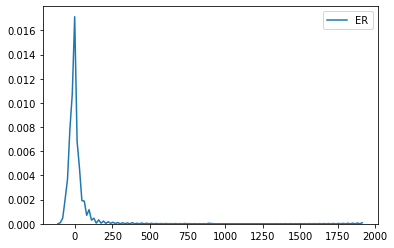

In [89]:
import seaborn as sns
import math

sns.kdeplot(train_1.ER)

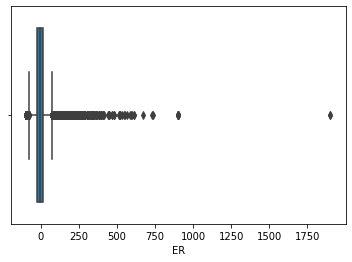

In [90]:
import matplotlib.pyplot as plt

sns.boxplot(train_1.ER)

각 피쳐별로 많은 이상치가 존재하는 것을 확인할 수 있다. 

정확한 EDA와 모델링을 위해 IQR을 통해 이상치를 제거하겠다.

In [91]:
# 각 피쳐들의 이상치를 제거

def outlier_indices(df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR = Q3 - Q1
    Q2 = df[feature].quantile(.5)
    Q4 = df[feature].quantile(1)
    outlier_step = IQR * 1.5
    outlier_indices = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
    
    return outlier_indices

indices = []
for i in ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH',
       'ER']:
    indices.append(outlier_indices(train_1,i))
    
a = []
for i in range(26):
    for j in indices[i]:
        if j in a:
            continue
        else:
            a.append(j)
            
IN = train_1.drop(a, axis = 0)

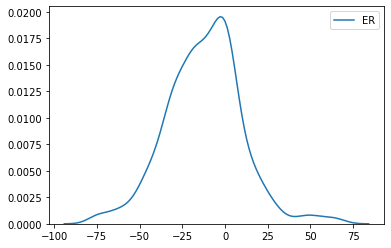

In [92]:
sns.kdeplot(IN.ER)

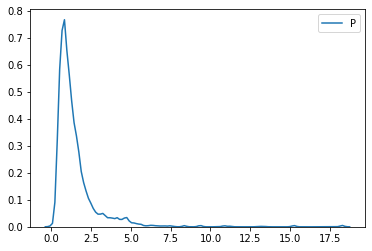

In [158]:
sns.kdeplot(train_1.P)

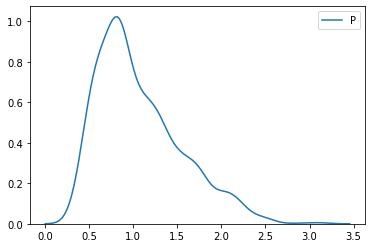

In [93]:
sns.kdeplot(IN.P)

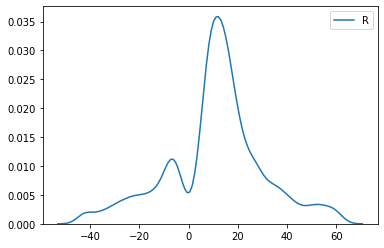

In [94]:
sns.kdeplot(IN.R)

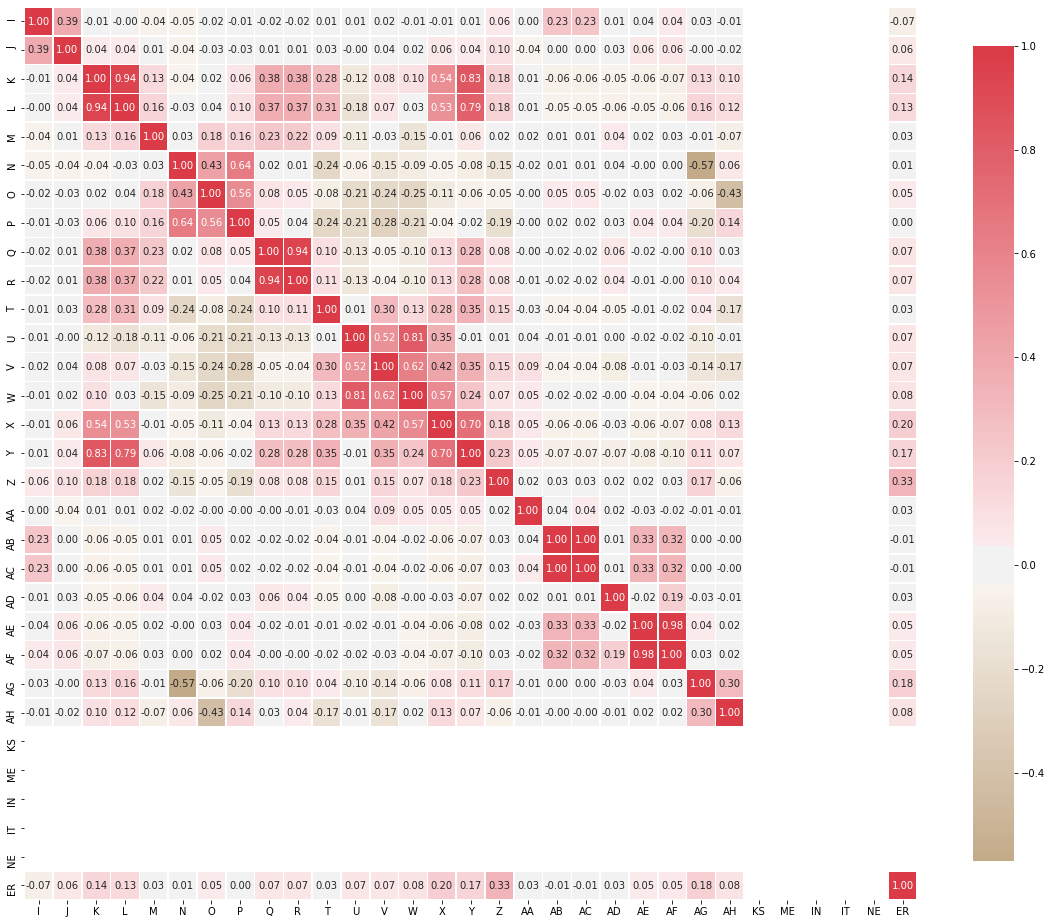

In [95]:
def corr_heatmap(var):
    correlations = IN[var].corr()
    cmap = sns.diverging_palette(50,10,as_cmap = True)
    
    fig,ax = plt.subplots(figsize = (20,20))
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center =0, fmt= '.2f', square = True, linewidths = .5, annot = True, cbar_kws = {"shrink" : .75 })
    plt.show();

indices = IN.columns
corr_heatmap(indices)

In [108]:
IN_X = IN.drop(['ER','KS','ME','IN','IT','NE','B','datetime'],axis = 1)
IN_Y = pd.DataFrame(IN[['ER']])

In [109]:
IN_X

,I,J,K,L,M,N,O,P,Q,R,...,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH
0,0.27933,-1.508916,3.2,1.3,9.492071,0.80,0.47,0.61,17.20,17.20,...,62.11,76,0.000192,0.000000,0.000192,0.001999,0.105979,0.107978,70.00,119.148936
1,0.00000,0.308642,3.2,1.3,8.594413,0.80,0.47,0.61,15.60,15.60,...,62.11,69,0.000000,0.003442,0.003442,0.002565,0.162150,0.164716,62.50,106.382979
2,1.53000,4.731861,4.1,1.6,8.781055,0.80,0.47,0.61,15.90,12.50,...,79.12,70,-0.000061,0.023156,0.023096,0.035185,-0.005690,0.029495,63.75,108.510638
3,-0.66000,-2.922078,4.0,1.6,10.533068,0.80,0.45,0.61,11.20,11.20,...,79.12,63,0.000000,-0.006982,-0.006982,-0.002383,-0.088874,-0.091258,56.25,100.000000
4,-0.16000,0.806452,3.4,1.4,11.018845,0.80,0.47,0.61,11.70,13.90,...,66.78,66,0.000108,-0.004862,-0.004755,-0.000635,-0.035950,-0.036585,58.75,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,-0.80000,0.000000,4.5,1.9,-3.010000,4.53,0.24,1.75,-8.90,21.19,...,21.00,56,0.000000,0.010000,0.010000,0.000000,-0.020000,-0.020000,20.00,379.000000
12152,1.70000,0.000000,4.9,1.5,-2.330000,4.53,0.24,1.68,20.67,20.67,...,21.00,62,0.000000,0.040000,0.040000,0.000000,0.310000,0.310000,22.00,421.000000
12153,-1.00000,-1.900000,4.9,1.5,-1.930000,4.53,0.24,1.68,17.10,17.10,...,21.00,52,0.000000,0.060000,0.060000,0.000000,0.190000,0.190000,18.00,346.000000
12159,0.00000,0.000000,11.1,2.9,-12.420000,4.53,0.24,1.63,8.08,8.08,...,48.00,61,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00,371.000000


In [110]:
IN_Y

,ER
0,3
1,-9
2,-7
3,-16
4,-12
...,...
12151,-39
12152,-40
12153,-50
12159,-51


In [121]:
test_data = test_set.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12'],axis = 1)

test_data_X = test_data.drop(['G','B','ER','KS','ME','IN','IT','NE','Unnamed: 0.1.1.1','datetime'],axis = 1)

test_IN_Y = pd.DataFrame(test_set[['ER']])

In [122]:
test_data_X

,I,J,K,L,M,N,O,P,Q,R,...,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH
29,-1.0,4.0,-9.3,-4.0,-21.57,0.80,0.34,0.52,-4.18,-4.18,...,-185.0,71,0.00,0.01,0.01,0.00,0.71,0.71,49.0,115.0
30,-0.6,3.0,-9.3,-4.0,-21.45,0.80,0.34,0.52,-4.16,-4.16,...,-185.0,86,0.00,0.00,0.00,0.01,-0.01,0.00,49.0,115.0
31,1.7,5.1,-9.3,-4.0,-17.27,0.80,0.31,0.52,-3.35,-3.35,...,-185.0,71,0.00,-0.01,-0.01,-0.01,0.03,0.02,39.0,100.0
32,1.4,4.7,-8.7,-3.8,-20.42,0.80,0.33,0.50,-3.78,-3.78,...,-174.0,75,0.00,-0.03,-0.02,0.01,0.00,0.00,41.0,100.0
33,0.0,-0.9,-8.7,-3.8,-19.36,0.80,0.31,0.50,-3.58,-3.58,...,-174.0,73,0.00,-0.01,-0.01,-0.04,-0.04,-0.08,39.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,3.0,4.0,-66.9,-21.4,7.27,12.01,0.26,1.73,-0.72,-0.72,...,-1007.0,7,-0.09,0.04,-0.04,-0.37,0.15,-0.22,4.0,185.0
12236,5.9,5.6,-94.6,-29.5,-79.00,12.01,0.26,1.68,-0.52,-0.52,...,-1415.0,12,-0.24,0.33,0.09,-1.41,0.39,-1.01,4.0,188.0
12237,9.1,8.9,-94.6,-29.5,-79.32,12.01,0.26,1.68,-0.52,-0.52,...,-1415.0,12,0.01,0.10,0.11,-0.08,0.35,0.27,4.0,188.0
12238,12.9,43.3,-97.5,-30.4,-112.12,12.01,0.26,1.68,-0.74,-0.72,...,-1458.0,42,0.00,-0.46,-0.45,0.00,-1.34,-1.34,6.0,277.0


In [123]:
test_IN_Y

,ER
29,-27
30,-27
31,-42
32,-38
33,-41
...,...
12235,-7
12236,-5
12237,-4
12238,34


이상치 제거후, test_set의 데이터가 train_set보다 오히려 더 많은 것을 확인했다. 

-> 이 부분에 대해서는 해결이 필요할듯

### IN 모델링

퀀트 데이터 자체가 시계열적인 부분은 고려하지 않으므로 시간별로 train, test set을 나누는게 아니라 train_test_split을 통해서 train과 test셋을 나눠준다.

랜덤포레스트를 통한 피쳐 셀렉션을 진행하겠다. 

그 후 여러 모델들을 비교하여, 앙상블할 모델을 선택하겠다.

In [169]:
X = data[['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH']]
Y = data['ER']

In [200]:
from sklearn.model_selection import train_test_split

IN_X, test_IN_X, IN_Y, test_IN_Y = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=123456)
transformer = RobustScaler()
scaled_X = transformer.fit_transform(IN_X)
model.fit(scaled_X, IN_Y)

print(model.score(scaled_X,IN_Y))

0.9573826327853563


In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

model = RandomForestRegressor(n_estimators=100, random_state=123456)
transformer = RobustScaler()
# 파이프라인 사용해야한다. 나중에 gridsearch 할 때 사용하는걸로 하자.
scaled_X = transformer.fit_transform(IN_X)
score = cross_val_score(model, scaled_X, IN_Y, cv = 5 )

print('cross val score : %s'%score.mean())

cross val score : 0.6772912724861878


In [183]:
model.fit(scaled_X,IN_Y)

RandomForestRegressor(random_state=123456)

In [184]:
scaled_test_X = transformer.fit_transform(test_IN_X)

predictions = model.predict(scaled_test_X)

In [185]:
predictions[0:10]

array([ -7.09,  11.17,  -9.73, -15.89,  -0.71, -19.66,  76.43, -25.38,
        14.48,   1.36])

[Text(0.5, 1.0, 'test')]

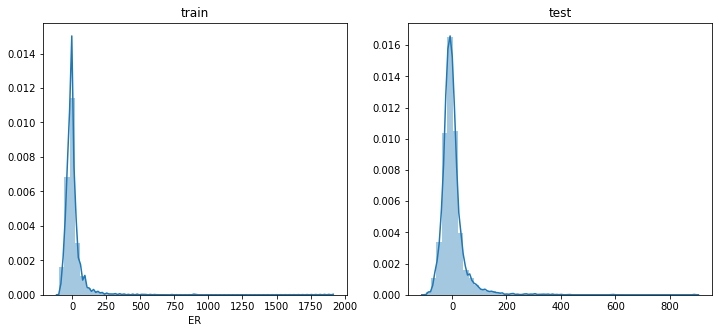

In [186]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(IN_Y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [208]:
print(model.score(scaled_test_X,test_IN_Y))

0.7029908671507363


In [210]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(predictions,test_IN_Y)
MSE

1216.0079622628991

MSE가 어느정도 되어야 좋은거지...??

Feature ranking:
1. feature 12 (0.119895)
2. feature 5 (0.109529)
3. feature 23 (0.104070)
4. feature 24 (0.097152)
5. feature 15 (0.082482)
6. feature 11 (0.081278)
7. feature 14 (0.076168)
8. feature 13 (0.043321)
9. feature 6 (0.038298)
10. feature 9 (0.032676)
11. feature 16 (0.032077)
12. feature 7 (0.031469)
13. feature 8 (0.030544)
14. feature 4 (0.030141)
15. feature 2 (0.015870)
16. feature 3 (0.012715)
17. feature 10 (0.009806)
18. feature 1 (0.009291)
19. feature 21 (0.009067)
20. feature 22 (0.007118)
21. feature 0 (0.007023)
22. feature 18 (0.006148)
23. feature 20 (0.005916)
24. feature 19 (0.004450)
25. feature 17 (0.003497)


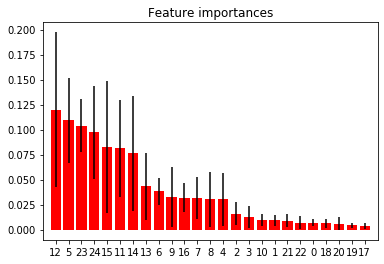

In [189]:
def feature_impt(model, x, y):
    model = model.fit(x, y)
    return model.feature_importances_

rf_impt = feature_impt(model,scaled_X, IN_Y)

# 랜덤포레스트를 통한 피쳐 임포턴스 확인

def graph_generator(model,importances, X):
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show() 

graph_generator(model, rf_impt, scaled_X)

In [195]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = .01)  #variancethreshold : 이상치를 제거해주는 함수
selector.fit(IN_X)  #id와 target을 제외하고 fit 시키기

f = np.vectorize(lambda x : not x)

v = IN_X.columns[f(selector.get_support())]
print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

0 variables have too low variance
These variables are []


분산이 너무 낮은 피쳐는 없는 것으로 확인된다.

### xgboost

xgboost를 통해서 정확도와 피쳐 임포턴스를 보겠다.

In [197]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

xgb = xgb.XGBRegressor(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
transformer = RobustScaler()

scaled_X = transformer.fit_transform(IN_X)
score = cross_val_score(xgb, scaled_X, IN_Y, cv = 5 )

print('cross val score : %s'%score.mean())

cross val score : 0.773814604358009


In [203]:
from sklearn.metrics import mean_squared_error

scaled_X = transformer.fit_transform(IN_X)
xgb.fit(scaled_X,IN_Y)
scaled_test_X = transformer.fit_transform(test_IN_X)
xgb_pred = xgb.predict(scaled_test_X)
MSE = mean_squared_error(test_IN_Y, xgb_pred)

In [205]:
np.sqrt(MSE)

30.513030816092193

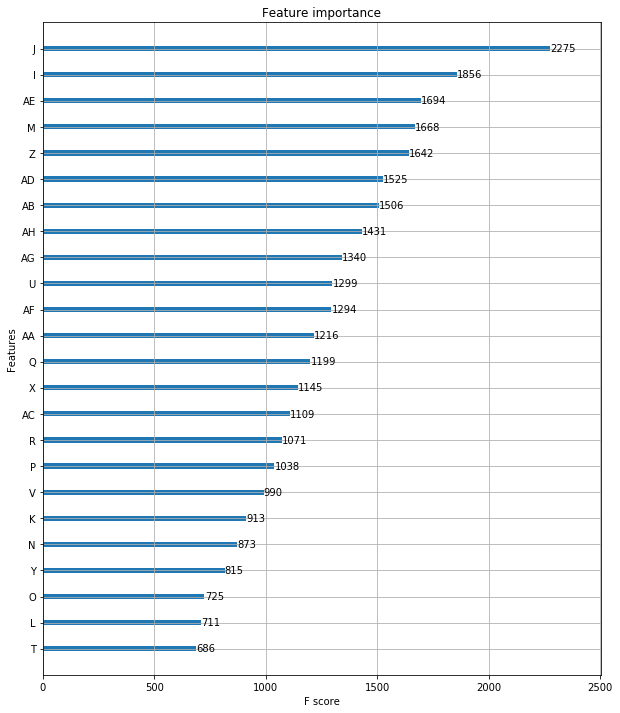

In [43]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

### 여러 모델의 정확도 비교

In [44]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier

### Simple modeling

SVC

Decision Tree

XGboost


AdaBoost

Random Forest

Extra Trees

Gradient Boosting

Multiple layer perceprton (neural network)

KNN

Logistic regression

Linear Discriminant Analysis

위 12개의 모델들의 정확도를 KFold Cross Validation을 통해서 평균낼 것이다,

In [45]:
# kfold를 통한 cross val
# cross val (교차검증) : validation set을 만들어 overfitting을 막는 역할, testset을 하나로 고정하는 것이 아니라 여러개로 만든다.

kfold = StratifiedKFold(n_splits = 10)  #sklearn에서의 KFold

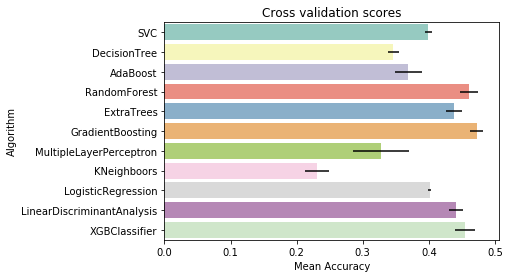

In [46]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state = random_state, learning_rate = 0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))  #extratreesclassifier : 더욱 랜덤한 randomforest
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,IN_X,y = IN_Y, scoring = 'accuracy', cv = kfold,n_jobs = -1 ))  #cross_val_score : 원하는 평가지표 평가 가능
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors':cv_std,'Algorithm':["SVC","DecisionTree", "AdaBoost","RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'XGBClassifier']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette='Set3',orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

상위 4개 기법인 LinearDiscriminantAnalysis, GradientBoosting, RandomForest, XGBClassifier을 앙상블 하겠다.

In [202]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(KS2_X,KS2_Y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 23.0min finished
C:\Users\jlee0\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.4667590027700831

### LSTM을 통해서 주가 예측

LSTM은 주가 class나 ER 지표가 아니라 주가 자체를 사용해보겠다.

In [228]:
train_set_IN = train_set[train_set.IN == 1]
IN_X  = train_set_IN.drop(['G','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','ER','KS','ME','IN','IT','NE','W'],axis = 1)
IN_Y = train_set_IN[['B','G','datetime']]

test_set_IN = test_set[test_set.IN == 1]
test_X = test_set_IN.drop(['G','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','ER','KS','ME','IN','IT','NE','W'],axis = 1)
test_Y = test_set_IN[['B','G','datetime']]

In [173]:
IN_X

,B,I,J,K,L,M,N,O,P,Q,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,datetime
36,A129260,0.27933,-1.508916,3.2,1.3,9.492071,0.80,0.47,0.61,17.20,...,76,0.000192,0.000000,0.000192,0.001999,0.105979,0.107978,70.00,119.148936,2017-01-01
37,A129260,0.00000,0.308642,3.2,1.3,8.594413,0.80,0.47,0.61,15.60,...,69,0.000000,0.003442,0.003442,0.002565,0.162150,0.164716,62.50,106.382979,2017-02-01
38,A129260,1.53000,4.731861,4.1,1.6,8.781055,0.80,0.47,0.61,15.90,...,70,-0.000061,0.023156,0.023096,0.035185,-0.005690,0.029495,63.75,108.510638,2017-03-01
39,A129260,-0.66000,-2.922078,4.0,1.6,10.533068,0.80,0.45,0.61,11.20,...,63,0.000000,-0.006982,-0.006982,-0.002383,-0.088874,-0.091258,56.25,100.000000,2017-04-01
40,A129260,-0.16000,0.806452,3.4,1.4,11.018845,0.80,0.47,0.61,11.70,...,66,0.000108,-0.004862,-0.004755,-0.000635,-0.035950,-0.036585,58.75,100.000000,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69972,A071970,0.60000,1.300000,25.2,5.4,-23.520000,12.01,0.26,1.87,3.63,...,11,0.000000,0.000000,0.000000,-0.410000,-0.010000,-0.420000,8.00,350.000000,2019-01-01
69973,A071970,-3.40000,-9.400000,25.2,5.4,-28.270000,12.01,0.26,1.87,4.36,...,13,0.000000,0.030000,0.030000,-0.120000,0.040000,-0.080000,9.00,423.000000,2019-02-01
69974,A071970,-2.10000,1.400000,25.2,5.4,-25.650000,12.01,0.26,1.87,3.95,...,12,0.010000,-0.020000,-0.020000,-0.080000,0.060000,-0.020000,8.00,385.000000,2019-03-01
69975,A071970,-1.40000,-1.700000,-68.0,-18.5,14.120000,12.01,0.26,1.78,-1.56,...,14,0.000000,0.030000,0.030000,0.000000,0.200000,0.200000,9.00,408.000000,2019-04-01


In [174]:
IN_Y

,B,G,datetime
36,A129260,3590,2017-01-01
37,A129260,3250,2017-02-01
38,A129260,3320,2017-03-01
39,A129260,2990,2017-04-01
40,A129260,3125,2017-05-01
...,...,...,...
69972,A071970,5450,2019-01-01
69973,A071970,6550,2019-02-01
69974,A071970,5940,2019-03-01
69975,A071970,5820,2019-04-01


In [175]:
IN_X[IN_X.B == 'A129260']

,B,I,J,K,L,M,N,O,P,Q,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,datetime
36,A129260,0.27933,-1.508916,3.2,1.3,9.492071,0.8,0.47,0.61,17.20,...,76,0.000192,0.000000,0.000192,0.001999,0.105979,0.107978,70.00,119.148936,2017-01-01
37,A129260,0.00000,0.308642,3.2,1.3,8.594413,0.8,0.47,0.61,15.60,...,69,0.000000,0.003442,0.003442,0.002565,0.162150,0.164716,62.50,106.382979,2017-02-01
38,A129260,1.53000,4.731861,4.1,1.6,8.781055,0.8,0.47,0.61,15.90,...,70,-0.000061,0.023156,0.023096,0.035185,-0.005690,0.029495,63.75,108.510638,2017-03-01
39,A129260,-0.66000,-2.922078,4.0,1.6,10.533068,0.8,0.45,0.61,11.20,...,63,0.000000,-0.006982,-0.006982,-0.002383,-0.088874,-0.091258,56.25,100.000000,2017-04-01
40,A129260,-0.16000,0.806452,3.4,1.4,11.018845,0.8,0.47,0.61,11.70,...,66,0.000108,-0.004862,-0.004755,-0.000635,-0.035950,-0.036585,58.75,100.000000,2017-05-01
41,A129260,-0.31000,0.934579,3.4,1.4,48.831902,0.8,0.47,0.60,14.40,...,69,0.000000,-0.014723,-0.014723,-0.006734,-0.024174,-0.030908,62.50,106.382979,2017-06-01
42,A129260,2.37000,2.204724,3.4,1.4,48.882557,0.8,0.47,0.60,14.50,...,69,0.001357,0.009075,0.010432,0.011613,0.022386,0.033999,62.50,106.382979,2017-07-01
43,A129260,-0.63000,-2.006173,3.4,1.4,48.882557,0.8,0.47,0.60,14.10,...,67,-0.000529,-0.005273,-0.005802,0.018984,-0.027793,-0.008809,61.25,104.255319,2017-08-01
44,A129260,-3.07000,-5.071315,3.4,1.4,-284.774907,0.8,0.45,0.60,13.20,...,63,0.001459,-0.025344,-0.023885,0.001212,-0.079870,-0.078658,56.25,100.000000,2017-09-01
45,A129260,0.83000,-1.136364,3.4,1.4,-289.569098,0.8,0.46,0.60,13.40,...,65,-0.000375,-0.009086,-0.009461,-0.000375,-0.034013,-0.034389,57.50,100.000000,2017-10-01


In [176]:
IN_Y[0:29]

,B,G,datetime
36,A129260,3590,2017-01-01
37,A129260,3250,2017-02-01
38,A129260,3320,2017-03-01
39,A129260,2990,2017-04-01
40,A129260,3125,2017-05-01
41,A129260,3240,2017-06-01
42,A129260,3245,2017-07-01
43,A129260,3175,2017-08-01
44,A129260,2995,2017-09-01
45,A129260,3045,2017-10-01


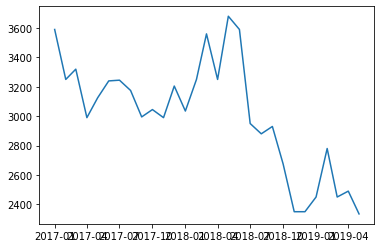

In [177]:
import matplotlib.pyplot as plt

x = IN_X[0:29].datetime
y = IN_Y[0:29]['G']
plt.plot(x, y)

In [178]:
# window 만들기. 3개월을 기준으로 사용할 것이며, many to one 방식을 이용할 것이다.

IN_X_1 = IN_X[IN_X.B == 'A129260']
IN_X_1 = IN_X_1.drop(['B','datetime'],axis = 1)
IN_Y_1 = IN_Y[IN_Y.B == 'A129260']
IN_Y_1 = IN_Y_1.drop(['B','datetime'],axis = 1)

window_len = 3

LSTM_training_inputs = []

for i in range(len(IN_X_1)-window_len+1):
    temp_set = IN_X_1[i:(i+window_len)].copy()
    
    LSTM_training_inputs.append(temp_set)
    
LSTM_training_outputs = np.array(IN_Y_1)

LSTM_training_inputs = np.array(LSTM_training_inputs)

In [230]:
# test 데이터 만들기

test_IN_X_1 = test_X[test_X.B == 'A129260']
test_IN_X_1 = test_IN_X_1.drop(['B','datetime'],axis = 1)
test_IN_Y_1 = test_Y[test_Y.B == 'A129260']
test_IN_Y_1 = test_IN_Y_1.drop(['B','datetime'],axis = 1)

window_len = 3
LSTM_test_inputs = []

for i in range(len(test_IN_X_1)-window_len+1):
    temp_set = test_IN_X_1[i:(i+window_len)].copy()
    
    LSTM_test_inputs.append(temp_set)

LSTM_test_outputs = np.array(test_IN_Y_1)

LSTM_test_inputs = np.array(LSTM_test_inputs)

In [182]:
# 처음 2달의 결과는 제외 시켜준다.

y_train = LSTM_training_outputs[2:29]
len(y_train)

27

In [209]:
y_train = np.asarray(y_train).astype('float32')

In [210]:
y_train

array([[3320.],
       [2990.],
       [3125.],
       [3240.],
       [3245.],
       [3175.],
       [2995.],
       [3045.],
       [2990.],
       [3205.],
       [3035.],
       [3250.],
       [3560.],
       [3250.],
       [3680.],
       [3590.],
       [2950.],
       [2880.],
       [2930.],
       [2675.],
       [2350.],
       [2350.],
       [2450.],
       [2780.],
       [2450.],
       [2490.],
       [2335.]], dtype=float32)

In [231]:
y_test = LSTM_test_outputs[2:29]
len(y_test)

5

In [232]:
y_test = np.asarray(y_test).astype('float32')

In [234]:
y_test

array([[2080.],
       [2210.],
       [2095.],
       [2250.],
       [2340.]], dtype=float32)

In [235]:
len(LSTM_test_inputs)

5

In [243]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error

# LSTM 모델링

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.10, loss="mae", optimizer="adam"):
    
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [246]:
nn_model = build_model(LSTM_training_inputs, output_size=1, neurons = 32)

In [248]:
nn_history = nn_model.fit(LSTM_training_inputs, y_train, 
                            epochs=100, batch_size=1, verbose=2, shuffle=True)

Epoch 1/100
27/27 - 0s - loss: 2974.2251
Epoch 2/100
27/27 - 0s - loss: 2974.0325
Epoch 3/100
27/27 - 0s - loss: 2973.9089
Epoch 4/100
27/27 - 0s - loss: 2973.6504
Epoch 5/100
27/27 - 0s - loss: 2973.4780
Epoch 6/100
27/27 - 0s - loss: 2973.3386
Epoch 7/100
27/27 - 0s - loss: 2973.0969
Epoch 8/100
27/27 - 0s - loss: 2972.8655
Epoch 9/100
27/27 - 0s - loss: 2972.6936
Epoch 10/100
27/27 - 0s - loss: 2972.4170
Epoch 11/100
27/27 - 0s - loss: 2972.2297
Epoch 12/100
27/27 - 0s - loss: 2972.1819
Epoch 13/100
27/27 - 0s - loss: 2971.9036
Epoch 14/100
27/27 - 0s - loss: 2971.5874
Epoch 15/100
27/27 - 0s - loss: 2971.6682
Epoch 16/100
27/27 - 0s - loss: 2971.2014
Epoch 17/100
27/27 - 0s - loss: 2971.1372
Epoch 18/100
27/27 - 0s - loss: 2970.9001
Epoch 19/100
27/27 - 0s - loss: 2970.6328
Epoch 20/100
27/27 - 0s - loss: 2970.6125
Epoch 21/100
27/27 - 0s - loss: 2970.2708
Epoch 22/100
27/27 - 0s - loss: 2970.3096
Epoch 23/100
27/27 - 0s - loss: 2969.8069
Epoch 24/100
27/27 - 0s - loss: 2969.6333
E

In [251]:
nn_model.predict(LSTM_test_inputs)

array([[20.961918],
       [20.961918],
       [20.961918],
       [20.961918],
       [20.961918]], dtype=float32)

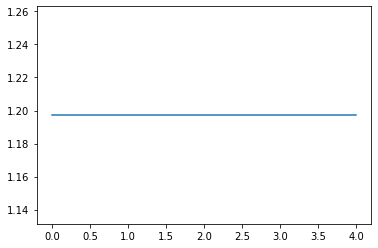

In [239]:
plt.plot(nn_model.predict(LSTM_test_inputs), label = "predicted")

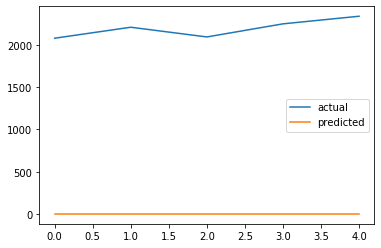

The Mean Absolute Error is: 2193.802734375


In [240]:
plt.plot(y_test, label = "actual")
plt.plot(nn_model.predict(LSTM_test_inputs), label = "predicted")
plt.legend()
plt.show()
MAE = mean_absolute_error(y_test, nn_model.predict(LSTM_test_inputs))
print('The Mean Absolute Error is: {}'.format(MAE))

In [203]:
nn_model.predict(LSTM_test_inputs)

array([[0.00196962],
       [0.00196962],
       [0.00196962],
       [0.00196962],
       [0.00196962]], dtype=float32)